# Лабораторная работа №1
###Конечномерная оптимизация, градиентные методы

#Постановка задачи


1. Запрогать GD модификацию, выбрать персонально 2 функции из книжки или scikit.
2. Их визуализировать, реализовать sgd, sgd+LR schedule
3. Запрогать 1 моментный метод и 1 адаптивный.











In [3]:
from matplotlib import pyplot as plt
import numpy as np  
from numpy import linalg as la
from datetime import datetime

#Функция Химмельблау

In [4]:
def Himmelblau(x):
    return (x[0] * x[0] + x[1] - 11) ** 2 + (x[0] + x[1] * x[1] - 7) ** 2

def Himmelblau_Grad(x):
    return np.array([4 * x[0] * (x[0] * x[0] + x[1] - 11) + 2 * (x[0] + x[1] * x[1] - 7), 4 * x[1] * (x[1] * x[1] + x[0] - 7) + 2 * (x[1] + x[0] * x[0] - 11)])

#Функция Бута

In [5]:
def Booth(x):
    return (x[0] +2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2
def Booth_Grad(x):  
    return np.array([10*x[0] + 8 * x[1] - 34, 10*x[1] + 8 * x[0] - 38])

#Градиентный спуск

In [61]:
def GD(
    func: callable, grad: callable, start_params: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1
    ) -> np.array:
    
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    
    for i in range(max_iter):
        params = params - lr * grad(params)
        history.append(np.array([params[0], params[1], func(params)]))

    return np.array(history)

In [62]:
def draw_result(func: callable, bounds: np.array, history: np.array, title: str) -> None:

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')
    
    x = np.linspace(bounds[0], bounds[1], 1000)
    y = np.linspace(bounds[0],bounds[1], 1000)
    
    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = func(np.array([x_grid, y_grid]))
    
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)    
    ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)

    fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(history)-1}", horizontalalignment="right", fontsize = 12)

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

[ 3.58442834e+00 -1.84812653e+00  4.70555530e-25]
0:00:00.029002


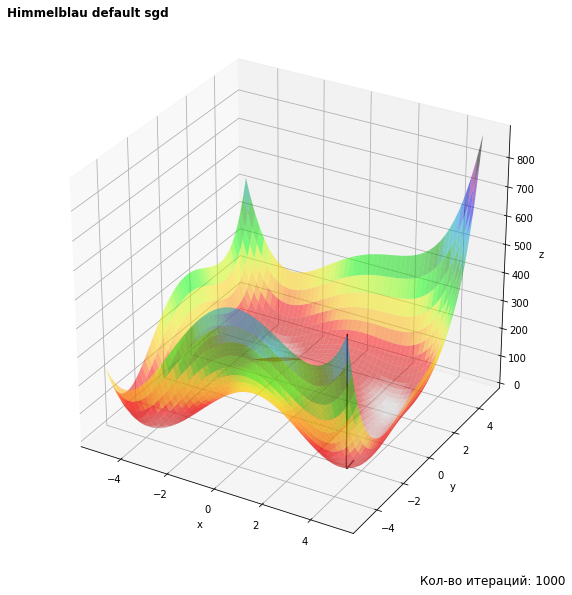

In [67]:
bounds = np.array([5,-5])
start_time = datetime.now()
history = GD(Himmelblau, Himmelblau_Grad, np.array([5,-5]), max_iter = 1000, lr = 0.001)
print(history[-1])
print( datetime.now() - start_time)
draw_result(Himmelblau, bounds, history, "Himmelblau default sgd")

[1.00000000e+00 3.00000000e+00 3.94430453e-30]
0:00:00.015939


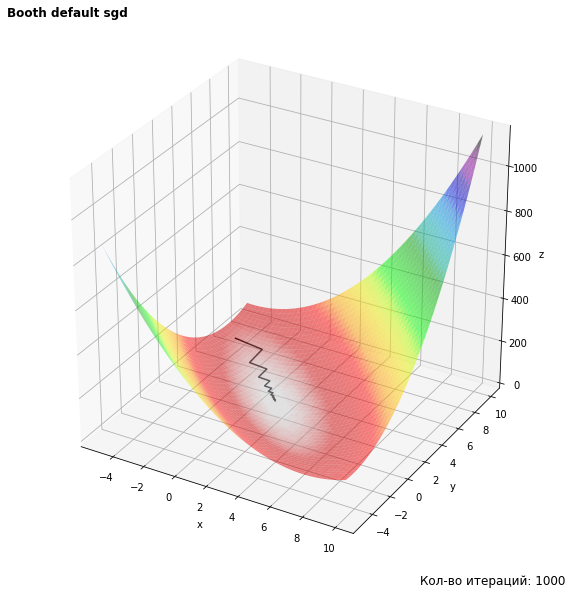

In [71]:
bounds = np.array([-5,10])
start_time = datetime.now()
history = GD(Booth, Booth_Grad, np.array([-4,7]), max_iter = 1000, lr = 0.1)
print(history[-1])
print( datetime.now() - start_time)
draw_result(Booth, bounds, history, "Booth default sgd")

#Градиентный спуск и Learning Rate Schedule

In [70]:
def GD_LRS(
    func: callable, grad: callable, start_params: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1,lre: int = 7, delta: float = 0.1
    ) -> np.array:
    
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    
    for i in range(max_iter):
        if i % lre == 0:
          lr *= delta
        params = params - lr * grad(params)
        history.append(np.array([params[0], params[1], func(params)]))

    return np.array(history)

0:00:00.026412


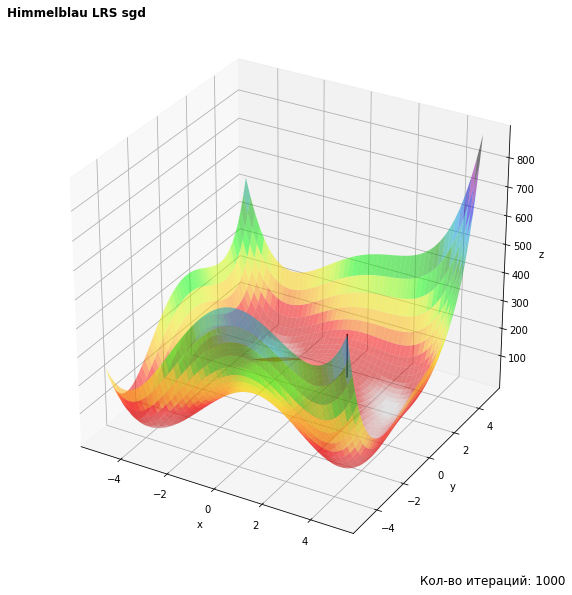

In [89]:
bounds = np.array([5,-5])
start_time = datetime.now()
history = GD_LRS(Himmelblau, Himmelblau_Grad, np.array([5,-5]), max_iter = 1000, lr = 0.001)
print( datetime.now() - start_time)
draw_result(Himmelblau, bounds, history, "Himmelblau LRS sgd")

[-4.57237246  5.97476499 66.89081979]
0:00:00.019369


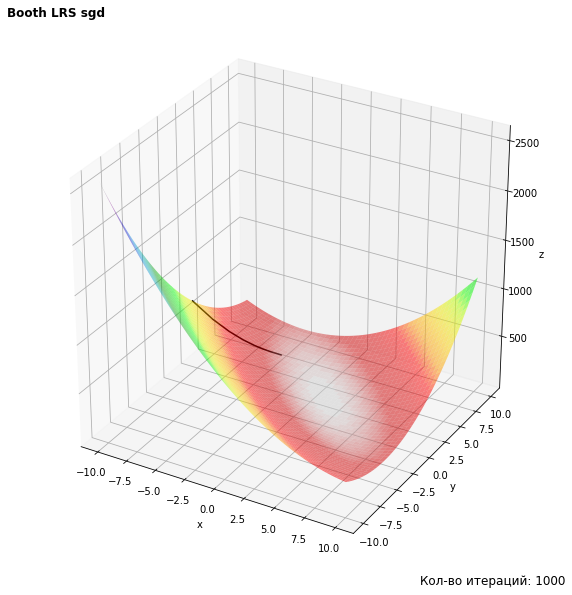

In [90]:
bounds = np.array([10,-10])
start_time = datetime.now()
history = GD_LRS(Booth, Booth_Grad, np.array([-10,2]), max_iter = 1000, lr = 0.1)
print(history[-1])
print(datetime.now() - start_time)
draw_result(Booth, bounds, history, "Booth LRS sgd")

#Моментный метод

In [91]:
def momentum_GD(
    func: callable, grad: callable, start_params: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1,lre: int = 7, delta: float = 0.1, beta: float = 0.5
    ) -> np.array:

    params_prev = start_params.copy()
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    
    for i in range(max_iter):
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev = params
        params = params_new
        
        history.append(np.array([params[0], params[1], func(params)]))

    return np.array(history)

0:00:00.031102


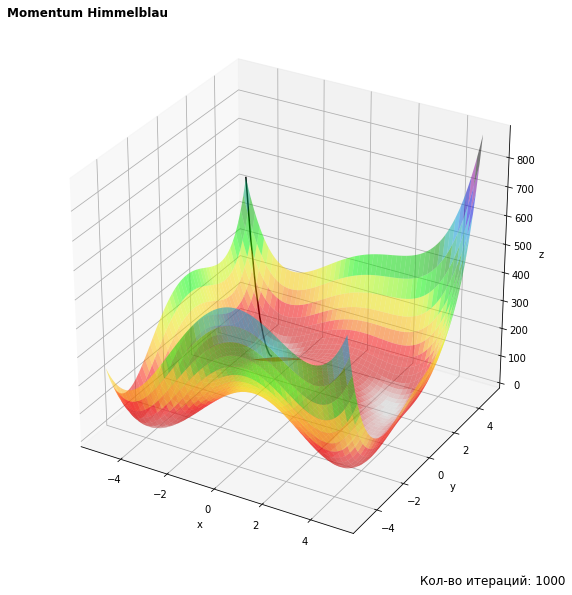

In [96]:
bounds = np.array([5,-5])
start_time = datetime.now()
history = momentum_GD(Himmelblau, Himmelblau_Grad, np.array([-5,5]), max_iter = 1000, lr = 0.001)
print(datetime.now() - start_time)
draw_result(Himmelblau, bounds, history, "Momentum Himmelblau")

0:00:00.013613


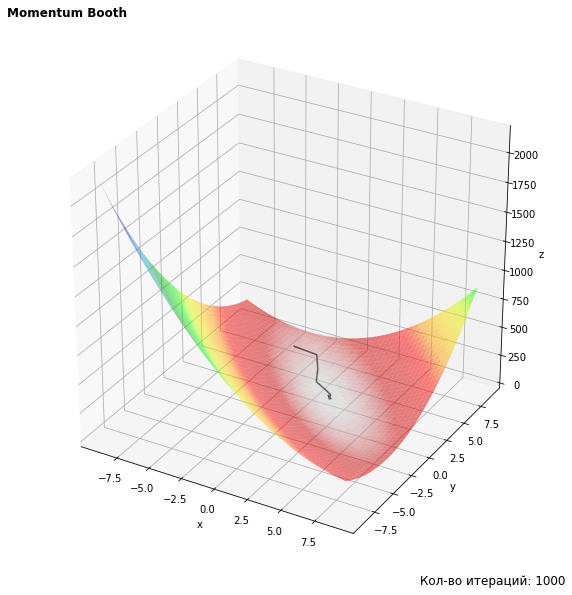

In [99]:
bounds = np.array([9,-9])
start_time = datetime.now()
history = momentum_GD(Booth, Booth_Grad, np.array([-4,7]), max_iter = 1000, lr = 0.1)
print( datetime.now() - start_time)
draw_result(Booth, bounds, history, "Momentum Booth")

#Адаптивный градиентный алгоритм

In [100]:
def Adam_GD(
    func: callable, grad: callable, start_params: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, b1: float = 0.6, b2: float = 0.999, e: float = 10e-8, delta: float = 0.001
    ) -> np.array:

    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]
    m = np.array([0, 0])
    v = np.array([0, 0])

    for i in range(max_iter):
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2
        params = params - lr * m / (np.sqrt(v) + e)
        history.append(np.array([params[0], params[1], func(params)]))

    return np.array(history)

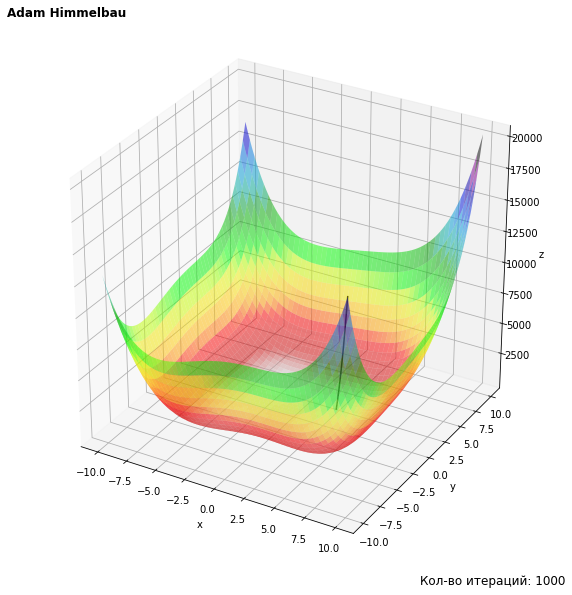

In [101]:
bounds = np.array([10,-10])
start_time = datetime.now()
history = Adam_GD(Himmelblau, Himmelblau_Grad, np.array([10,-10]), max_iter = 1000, lr = 0.001)
draw_result(Himmelblau, bounds, history, "Adam Himmelbau")

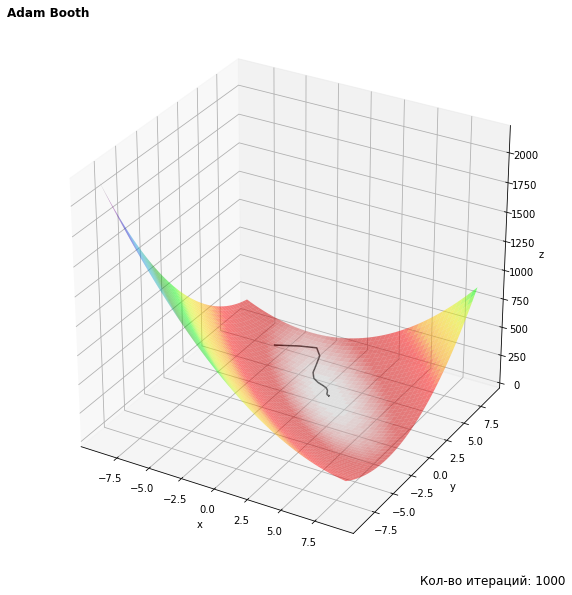

In [102]:
bounds = np.array([9,-9])
start_time = datetime.now()
history = Adam_GD(Booth, Booth_Grad, np.array([-5,6]), max_iter = 1000, lr = 0.1)
draw_result(Booth, bounds, history, "Adam Booth")